# Projeto 1 - Ciência dos Dados
___

## Introdução da organização:

**European Atomic Energy Community (EAEC ou Euratom)** é uma organização internacional criada pelo Tratado Euratom em 25 de Março de 1957 com o objetivo inicial de criar um mercado especializado para a energia nuclear na Europa, desenvolvendo energia nuclear e distribuindo-a aos seus Estados-Membros e vendendo o excedente a estados não membros. No entanto, ao longo dos anos, o seu âmbito foi consideravelmente aumentado para abranger uma grande variedade de áreas associadas à energia nuclear e radiações ionizantes, assim como garantir que materiais nucleares e radiações sejam armazenadas de forma segura. Também auxilia na construção do ITER (International Thermonuclear Experimental Reactor) que é um projeto de reator experimental considerado a próxima fase na evolução da energia nuclear.

## Pergunta (s) a ser respondida:

**Pergunta:** Países que fazem parte da EAEC possuem menos gastos e baixa no cosumo de petróleo do que os que não fazem?


## Explicação da hipótese e mecanismo:

**Hipótese :** Os países participantes passam a fazer mais uso da energia nuclear diminuindo o consumo e gastos com petróleo.

**Mecanismo:** Com o desenvolvimento do mercado de energia nuclear e o aumento do seu consumo os países que produzem mais do que consomem acabam distribuindo para os estados membros que necessitam, assim, tanto os que produzem quanto os que consomem acabam necessitando cada vez menos do petróleo, que é a fonte de energia mais utilizada no resto do planeta, obtendo uma baixa no seu consumo.

**Referência:** http://ansnuclearcafe.org/2013/12/10/do-oil-and-gas-suppliers-worry-about-nuclear/#sthash.9w6QfkRu.dpbs <br>
*("Nuclear fission heat has already reduced the world’s dependence on oil; there is plenty of remaining opportunity. Nuclear energy pushed oil out of the electricity market in most of the developed world.")*

## Bases de dados usadas:

Dados da **produção de energia nuclear** foi retirado do The World Bank.
- https://data.worldbank.org/indicator/EG.ELC.NUCL.KH

Dados do **consumo e produção de petróleo** foram retirados do site da BP (British Petroleum), que é uma empresa multinacional sediada no Reino Unido que opera no setor de energia.
- https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html 
- https://www.bp.com/statisticalreview

Dados do **PIB mundial** retirados do Gapminder 
- https://gapm.io/dgdppc

## Análise de dados:

In [87]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#Leitura dos arquivos do Excel
prod_nuclear = pd.read_excel('nuclear_power_generation_total.xlsx')
consumo_oil = pd.read_excel('oil_consumption_total.xlsx')
prod_oil = pd.read_excel('oil_production_total.xlsx')
gdp_ppp = pd.read_excel('total_gdp_ppp_inflation_adjusted.xlsx')

**Tabela qualitativa com os integrantes da EAEC**

In [89]:
#Tabela qualitativa
quali=prod_nuclear
paises_na_EAEC = []
paises_EAEC = ['Belgium','Bulgaria','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
for pais in quali ["country"]:
    if pais in paises_EAEC:
        paises_na_EAEC.append("sim")
    else:
        paises_na_EAEC.append('não')
quali["Está na EAEC"]=paises_na_EAEC
a=quali.set_index('country')
e=a.iloc[:,52:]
e

,Está na EAEC
country,
Argentina,não
Armenia,não
Belgium,sim
Brazil,não
Bulgaria,sim
Canada,não
China,não
Czech Republic,não
Finland,sim


### Produção de energia nuclear dos países analisados.

**1) Filtragem dos dados.**

Vamos começar analisando como a produção de energia nuclear dos países membros se comportou entres os anos  de 1995 e 2010.

In [90]:
#Filtragem de dados por ano.
prod_nuclear
prod_nuclear_anos = prod_nuclear.set_index('country')
linhas = ['Belgium','Bulgaria','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
producao_nuclear95_ue =prod_nuclear_anos.loc[linhas, colunas]
x=producao_nuclear95_ue.sort_values(by=2010, ascending=False)
x.head(5)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
France,32400000.0,34200000.0,34000000.0,33400000.0,33900000.0,35700000.0,36200000.0,37600000.0,37900000.0,38500000.0,38800000.0,38700000.0,37800000.0,37800000.0,35200000.0,36900000.0
Germany,13200000.0,13800000.0,14700000.0,13900000.0,14600000.0,14600000.0,14700000.0,14200000.0,14200000.0,14400000.0,14000000.0,14400000.0,12100000.0,12800000.0,11600000.0,12100000.0
United Kingdom,7650000.0,8140000.0,8440000.0,8550000.0,8180000.0,7310000.0,7750000.0,7550000.0,7630000.0,6880000.0,7020000.0,6490000.0,5420000.0,4510000.0,5940000.0,5340000.0
Spain,4770000.0,4840000.0,4760000.0,5070000.0,5060000.0,5350000.0,5480000.0,5420000.0,5320000.0,5470000.0,4950000.0,5170000.0,4740000.0,5070000.0,4540000.0,5330000.0
Sweden,6010000.0,6390000.0,6010000.0,6330000.0,6290000.0,4930000.0,6200000.0,5860000.0,5800000.0,6660000.0,6220000.0,5760000.0,5760000.0,5490000.0,4490000.0,4970000.0


Filtramos a tabela do Excel para que restasse apenas os países que fazem parte da organização e que temos acesso as informações, quando analisarmos os países da EAEC iremos sempre considerar esses mesmos países durante a mesma janela de anos no decorrer do projeto.

<br>

É efetuado o mesmo processo para países fora da organização com o intuíto de executar futuras comparações.

In [91]:
prod_nuclear_anos_neaec = prod_nuclear.set_index('country')
linhass = ['United States','South Korea', 'Japan', 'Canada', 'Switzerland', 'Mexico', 'Argentina', 'Armenia', 'Brazil', 'China', 'Pakistan', 'Russia', 'South Africa', 'Ukraine']
colunass = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
producao_nuclear95_nue =prod_nuclear_anos.loc[linhass, colunass]
z=producao_nuclear95_nue.sort_values(by=2010, ascending=False)
z.head(5)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
United States,61400000.0,61500000.0,57300000.0,61400000.0,66400000.0,68600000.0,68200000.0,69200000.0,67700000.0,69900000.0,69700000.0,70200000.0,71900000.0,72000000.0,71400000.0,72100000.0
Japan,25000000.0,26000000.0,27400000.0,28600000.0,27200000.0,27700000.0,27500000.0,25400000.0,20600000.0,24300000.0,26200000.0,26100000.0,22700000.0,22200000.0,24100000.0,24800000.0
Russia,8560000.0,9380000.0,9330000.0,9060000.0,10500000.0,11200000.0,11800000.0,12200000.0,12900000.0,12400000.0,12900000.0,13500000.0,13800000.0,14000000.0,14100000.0,14700000.0
South Korea,5760000.0,6360000.0,6630000.0,7710000.0,8860000.0,9370000.0,9640000.0,10200000.0,11200000.0,11200000.0,12600000.0,12800000.0,12300000.0,13000000.0,12700000.0,12800000.0
Canada,8410000.0,7980000.0,7100000.0,6150000.0,6320000.0,6260000.0,6600000.0,6490000.0,6440000.0,7770000.0,7910000.0,8420000.0,8040000.0,8080000.0,7750000.0,7800000.0


Os selecionados para o grupo de controle de fora da organização são formados pelos países que restaram na tabela do Excel após a filtragem da primeira tabela, quando for feita a análise dos países de fora da EAEC iremos sempre considerar esse mesmo grupo durante a mesma janela de anos no decorrer do projeto.

**2) Calculo das medianas.**

Aqui, é feito o calculo das medianas da produção de energia nuclear, tanto dos paises fora quanto os dentro para analisar como se comportaram durante os anos.

In [92]:
#Dentro da EAEC.
mediana_nuclear_prod_eaec=x.median()
tabela_mediana_= pd.DataFrame(data=mediana_nuclear_prod_eaec, columns = ['Mediana da prod. de energia nuclear dos países da EAEC'])
tabela_mediana_
#Fora da EAEC.
mediana_nuclear_prod_n_eaec=z.median()
tabela_mediana= pd.DataFrame(data=mediana_nuclear_prod_n_eaec, columns = ['Mediana da prod. de energia nuclear dos países fora da EAEC'])
tabela_mediana

median = tabela_mediana_.join(tabela_mediana)
median

,Mediana da prod. de energia nuclear dos países da EAEC,Mediana da prod. de energia nuclear dos países fora da EAEC
1995,1650000.0,1620000.0
1996,1620000.0,1695000.0
1997,1665000.0,1715000.0
1998,1665000.0,1715000.0
1999,1670000.0,1755000.0
2000,1745000.0,1855000.0
2001,1820000.0,1905000.0
2002,1830000.0,2250000.0
2003,1750000.0,3045000.0
2004,1705000.0,3330000.0


**3) Visualização dos dados e comparação**

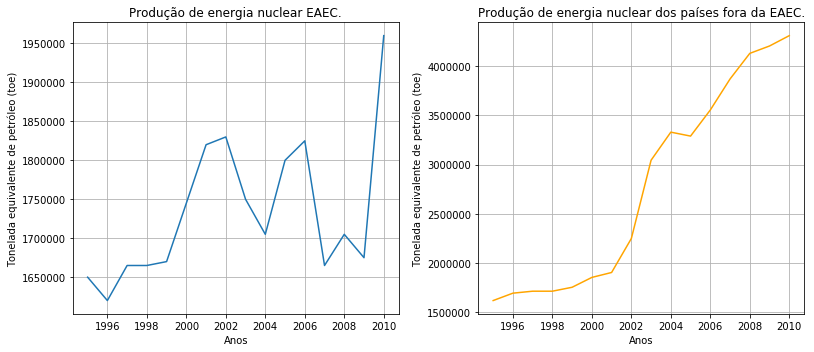

In [93]:
#Visualização das informações da tabela.
tabela_mediana_
tabela_mediana
fig = plt.figure(figsize=(17, 5))

plt.subplot(131)
tabela_mediana_["Mediana da prod. de energia nuclear dos países da EAEC"].plot()
plt.title('Produção de energia nuclear EAEC.')
plt.xlabel('Anos')
plt.ylabel('Tonelada equivalente de petróleo (toe)')
plt.grid()
plt.tight_layout()

plt.subplot(132)
tabela_mediana["Mediana da prod. de energia nuclear dos países fora da EAEC"].plot(color='orange')
plt.title('Produção de energia nuclear dos países fora da EAEC.')
plt.xlabel('Anos')
plt.ylabel('Tonelada equivalente de petróleo (toe)')
plt.grid()
plt.tight_layout()

No primeiro gráfico de linhas percebemos uma queda nos valores entre 2002 e 2004 que foram consequencia de dois acidentes nucleares de escala 2 e 3 envolvendo Belgica e Hungria. Já no período de 2006 a 2008 acidentes com reatores da Belgica, Suécia e Reino Unido de escala 4, 3 e 2 ocorreram gerando uma grave baixa na produção de energia nuclear da organização. Apesar de todos os incidentes a evolução na produção de energia nuclear é clara. No segundo gráfico, percebemos que a produção de energia fora da organização tambem é cresente, até mais que os participantes da EAEC, indicando que esse aumento da produção não é exlusivo dos participantes mas sim uma tendência mundial.

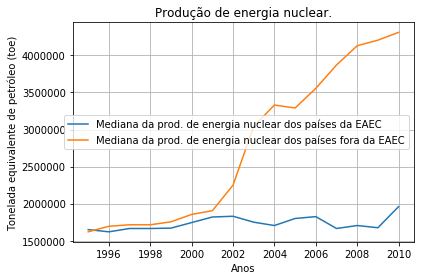

In [94]:
#Porque uma descrepância tão grande de valores?
median.plot()
plt.title('Produção de energia nuclear.')
plt.xlabel('Anos')
plt.ylabel('Tonelada equivalente de petróleo (toe)')
plt.grid()
plt.tight_layout()

A diferença na quatidade de energia produzida é explicada pelo fato de os países fora da organização conterem os Estados Unidos, Japão e Russia que são os maiores produtores de energia nuclear do mundo.

**E a diferença no consumo de petróleo?**

### Consumo de petróleo dos países analisados.

**1) Filtragem dos dados.**

Vamos examinar o consumo de petróleo dos paises em análise para observar se realmente houve baixa no seu consumo dentro dos paises da organização.

In [95]:
#Dados dos países da Organização
consumo_oil_anos=consumo_oil.set_index('country')
linhasss = ['Belgium','Bulgaria','Finland','Romania','France','Hungary','Lithuania','Netherlands','Slovak Republic','Spain','Sweden', 'United Kingdom','Denmark','Greece']
colunasss = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
consumo_oil95_ue =consumo_oil_anos.loc[linhasss, colunasss]
y=consumo_oil95_ue.sort_values(by=2010, ascending=False)
y.head(5)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
France,89000000,91000000,91700000,95000000,96400000,94900000,95500000,92900000,93100000,94000000,93100000,93000000,91400000,90800000,87500000,84500000
United Kingdom,82200000,84200000,81700000,81200000,79900000,78800000,78700000,78200000,78700000,81000000,83800000,83200000,80700000,79500000,75800000,74900000
Spain,57500000,59100000,61600000,66700000,69000000,69900000,73000000,73700000,76200000,78500000,79300000,79300000,80300000,78000000,73500000,72100000
Netherlands,38700000,38300000,40300000,40500000,41500000,42700000,44800000,44700000,45100000,47100000,50100000,50800000,50700000,47300000,45900000,45900000
Belgium,27700000,30200000,31000000,31300000,30100000,30900000,31000000,31700000,33700000,33700000,33600000,33800000,34600000,36000000,31500000,32700000


In [96]:
#Dados dos países fora da Organização
consumo_oil
linhas2 = ['United States', 'South Korea', 'Japan', 'Canada', 'Switzerland', 'Mexico','Philippines', 'Argentina','Brazil', 'China', 'India', 'Pakistan', 'Russia', 'South Africa', 'Ukraine']
colunas2 = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
consumo_oil95_nue =consumo_oil_anos.loc[linhas2, colunas2]
v=consumo_oil95_nue.sort_values(by=2010, ascending=False)
v.head(5)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
United States,796000000,824000000,835000000,851000000,874000000,883000000,883000000,884000000,899000000,935000000,938000000,931000000,929000000,875000000,833000000,850000000
China,160000000,176000000,192000000,197000000,209000000,224000000,229000000,248000000,277000000,323000000,329000000,353000000,371000000,378000000,393000000,448000000
Japan,269000000,271000000,267000000,256000000,261000000,257000000,249000000,244000000,250000000,244000000,247000000,238000000,231000000,225000000,200000000,203000000
India,75200000,81100000,86500000,92500000,100000000,106000000,107000000,113000000,116000000,119000000,122000000,128000000,138000000,145000000,153000000,155000000
Russia,151000000,130000000,128000000,123000000,126000000,123000000,127000000,122000000,126000000,125000000,125000000,130000000,130000000,134000000,128000000,133000000


**2) Calculo das medianas.**

É feito o calculo das medianas para fazer uma comparação apropriada.

In [97]:
#Mediana dos países da EAEC
mediana_oil_cons_eaec=y.median()
tabela_medianaaa= pd.DataFrame(data=mediana_oil_cons_eaec, columns = ['Mediana do consumo de petróleo dos países da EAEC'])
tabela_medianaaa
#Mediana dos países fora da EAEC
mediana_oil_cons_neaec=v.median()
tabela_medianaaaa= pd.DataFrame(data=mediana_oil_cons_neaec, columns = ['Mediana do consumo de petróleo dos países fora da EAEC'])
r=tabela_medianaaaa/10
#Junção das tabelas
mediana = tabela_medianaaa.join(r)
mediana

,Mediana do consumo de petróleo dos países da EAEC,Mediana do consumo de petróleo dos países fora da EAEC
1995,15050000.0,7520000.0
1996,15200000.0,8110000.0
1997,15400000.0,8650000.0
1998,14600000.0,8860000.0
1999,14000000.0,9000000.0
2000,13400000.0,9010000.0
2001,13350000.0,9130000.0
2002,13800000.0,9380000.0
2003,14600000.0,9230000.0
2004,14200000.0,9600000.0


**3) Análise dos dados e comparação**

Por fim, podemos analisar se nossa hipótese se confirma.

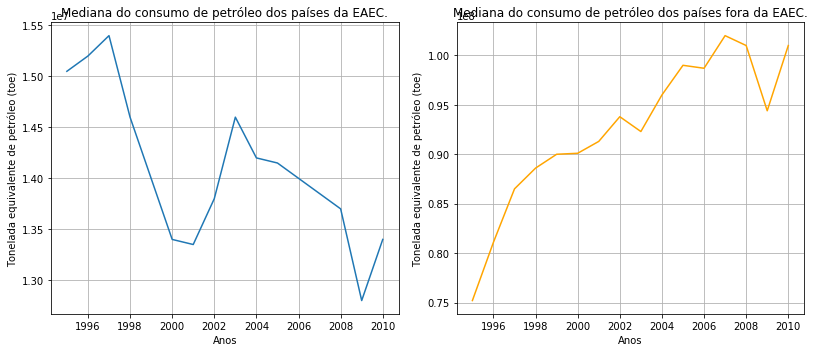

In [98]:
# Visualização das informações da tabela.
fig = plt.figure(figsize=(17, 5))

plt.subplot(131)
tabela_medianaaa["Mediana do consumo de petróleo dos países da EAEC"].plot()
plt.title('Mediana do consumo de petróleo dos países da EAEC.')
plt.xlabel('Anos')
plt.ylabel('Tonelada equivalente de petróleo (toe)')
plt.grid()
plt.tight_layout()

plt.subplot(132)
tabela_medianaaaa["Mediana do consumo de petróleo dos países fora da EAEC"].plot(color='orange')
plt.title('Mediana do consumo de petróleo dos países fora da EAEC.')
plt.xlabel('Anos')
plt.ylabel('Tonelada equivalente de petróleo (toe)')
plt.grid()
plt.tight_layout()


Como demonstrado acima, o consumo de petróleo dos países da organização de fato sofreu uma baixa extremamente notável, enquanto os de fora da organização, mesmo produzindo uma grande quantidade de energia nuclear, apresentam uma crescente no consumo do combustível fóssil. Isso prova a eficiência da organização e que os países da EAEC acabam tendo, por consequência, menos gastos com petróleo enquanto países fora continuam gastando mais ou o mesmo. Isso acontece porque os países da EAEC não só produzem mas tambem fazem a distribuição dessa energia para seus outros membros, assim fazendo com que esses países que não produzem a energia nuclear tambem gastem menos com petróleo, gerando uma baixa geral no consumo de todos os participantes.

C:\Users\Vitor Bandeira\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


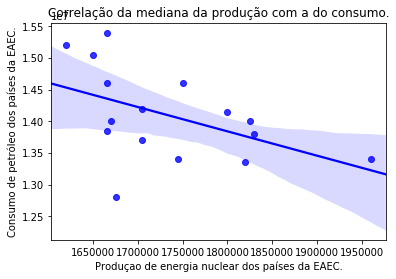

Correlação: -0.4823166754370871



In [99]:
df = tabela_mediana_.join(tabela_medianaaa, lsuffix='Energia Nuclear', rsuffix='Petróleo')
df
cor=df.corr()

sns.regplot(df['Mediana da prod. de energia nuclear dos países da EAEC'], df['Mediana do consumo de petróleo dos países da EAEC'], color=('blue'))
plt.title('Correlação da mediana da produção com a do consumo.')
plt.xlabel('Produçao de energia nuclear dos países da EAEC.')
plt.ylabel('Consumo de petróleo dos países da EAEC.')
plt.show()
print("Correlação: {}\n".format(cor['Mediana da prod. de energia nuclear dos países da EAEC']['Mediana do consumo de petróleo dos países da EAEC']))

Neste gráfico fica clara a correlação negativa entre o consumo de petróleo e a produção de energia nuclear dentro dos países da EAEC.

### Relação do petróleo com o PIB.

Como a relação do PIB com o petróleo ajuda a sustentar a hipótese analisada?

**1) Filtragem dos dados para os países da EAEC.**

In [100]:
#Filtragem dos dados.
gdpp= gdp_ppp.set_index('country')
linhas = ['Belgium','Bulgaria','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
gdp_eaec=gdpp.loc[linhas, colunas]
gdp_eaec.head(5)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Belgium,323000000000,327000000000,337000000000,344000000000,355000000000,369000000000,372000000000,378000000000,383000000000,396000000000,404000000000,4.150000e+11,4.260000e+11,4.300000e+11,4.170000e+11,4.260000e+11
Bulgaria,77200000000,70000000000,66300000000,69200000000,70900000000,74900000000,78200000000,82300000000,86100000000,92000000000,98000000000,1.040000e+11,1.110000e+11,1.180000e+11,1.110000e+11,1.120000e+11
Lithuania,35900000000,37400000000,39700000000,42300000000,41300000000,42700000000,45300000000,48300000000,52900000000,56700000000,60900000000,6.570000e+10,7.220000e+10,7.420000e+10,6.320000e+10,6.490000e+10
Netherlands,497000000000,517000000000,541000000000,564000000000,591000000000,615000000000,628000000000,630000000000,635000000000,652000000000,665000000000,6.900000e+11,7.180000e+11,7.310000e+11,7.030000e+11,7.130000e+11
Finland,134000000000,140000000000,148000000000,157000000000,163000000000,171000000000,175000000000,178000000000,181000000000,188000000000,194000000000,2.030000e+11,2.140000e+11,2.140000e+11,1.960000e+11,2.030000e+11


Filtragem dos dados da tabela para os preceitos analisados e discutidos anteriormente.

C:\Users\Vitor Bandeira\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


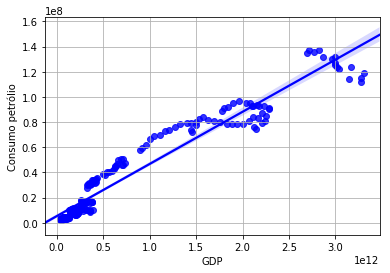

Correlação: 0.9697816711562737



In [101]:
consumo_oil.set_index('country', inplace=True)
consumo_oil = consumo_oil.loc[linhas, colunas]
stack_consumo_oil = consumo_oil.stack()
stack_gdp_eaec = gdp_eaec.stack()

dataf_consumo_gdp_eaec = pd.DataFrame({'GDP': stack_gdp_eaec, 'Consumo petrólio': stack_consumo_oil})
dataf_consumo_gdp_eaec

correlation=dataf_consumo_gdp_eaec.corr()
sns.regplot(dataf_consumo_gdp_eaec['GDP'], dataf_consumo_gdp_eaec['Consumo petrólio'], color=('blue'))
plt.grid()
plt.show()
print("Correlação: {}\n".format(correlation['GDP']['Consumo petrólio']))


Neste gráfico observamos uma forte correlação positiva entre o PIB e o consumo do petróleo, que nos faz inferir que países desenvolvidos necessitam de cade vez mais energia gerando mais consumo e por consequência, mais gastos com o petróleo.

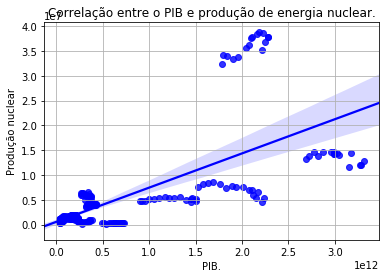

Correlação: 0.6852452854476144



In [102]:
x
stack_prod_nuclear = x.stack()
stack_gdp_eaec = gdp_eaec.stack()
dataf_prodnuc_gdp_eaec = pd.DataFrame({'GDP': stack_gdp_eaec, 'Produção nuclear': stack_prod_nuclear})

correlationn=dataf_prodnuc_gdp_eaec.corr()
sns.regplot(dataf_prodnuc_gdp_eaec['GDP'], dataf_prodnuc_gdp_eaec['Produção nuclear'], color=('blue'))
plt.title('Correlação entre o PIB e produção de energia nuclear.')
plt.xlabel('PIB.')
plt.grid()
plt.show()
print("Correlação: {}\n".format(correlationn['GDP']['Produção nuclear']))

Já nesta correlação podemos evidenciar o fato de que quanto maior é o PIB do país mais energia nuclear ele produz, pois como analisado na celula anterior, necessitam de mais energia.

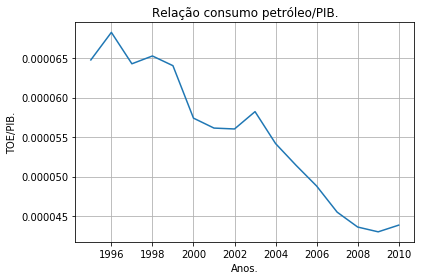

In [103]:
consumo_oil = consumo_oil.loc[linhas, colunas]
t=consumo_oil.median()
g=gdp_eaec.median()
f=t/g
f.plot()
plt.title('Relação consumo petróleo/PIB.')
plt.xlabel('Anos.')
plt.ylabel('TOE/PIB.')
plt.grid()
plt.tight_layout()

TOE: Tonelada equivalente de petróleo.

Por fim, quando analisamos um gráfico de consumo de petróleo dividido pelo PIB por ano, conseguimos observar que no decorrer desse tempo os países da organização passam a ter uma baixa na relação PET/PIB que demonstra aumento no PIB e redução no consumo de petróleo, fortificando a hipótese.

## Conclusão.

Responda à pergunta, argumento da melhor forma possível com base nos dados

Após a análise conjunta de todas as variáveis é possível concluir, que há sim um relação entre consumo e gastos em petróleo com o aumento da produção de energia nuclear dentro da EAEC, onde os países participantes fazem mais uso da energia nuclear diminuindo o consumo e gerando menos gastos. Pois, com o desenvolvimento do mercado de energia nuclear os países que produzem acabam distribuindo para membros que necessitam, assim fazendo com que todos acabem diminuindo gastos. É possível observar através dos gráficos o aumento na produção de energia nuclear, não só na EAEC mas sim no mundo inteiro, porém, a eficácia da hipótese pode ser observada quando comparamos a mediana do consumo de petróleo dos países da organização com os que estão fora, é notável e de fácil conclusão, principalmente após analisarmos o gráfico de correlação entre a mediana da produção com a mediana de consumo de petróleo, que os membros da EAEC passam a consumir bem menos enquanto os que estão fora só crescem, isso acontece por conta da distribuição de energia que ocorre entre os membros. <br>
Ao analisarmos a relação do consumo de petróleo com o PIB, é possível perceber que os países que possuem PIBs altos, ou seja, são desenvolvidos, passam a necessitar cada vez de mais energia, isso é facilmente compreendido quando lembramos que um PIB elevado significa que há um mercado desenvolvido para garantir consumo igualmente forte e um setor industrial capaz de garantir essa produção, que só leva a um PIB cada vez mais crescente, e por consequência mais consumo de energia. Essa necessidade por mais energia também pode ser observada no gráfico de correlação entre o PIB e a produção de energia nuclear, pois quanto maior o PIB maior é a carência por energia. Por fim, conseguimos sedimentar mais nossa hipótese ao ver a relação de consumo de petróleo dividido pelo PIB por ano, que nos da evidência que houve um aumento no PIB dos países e diminuição do consumo de petróleo que foi causado pelo aumento do consumo e produção da energia nuclear.
